Data Loading

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import scvi
import anndata
import scipy

Global seed set to 0


In [2]:
sc.set_figure_params(dpi = 100, fontsize = 12, facecolor='white')

In [3]:
adata = scvi.data.heart_cell_atlas_subsampled()

INFO     File data/hca_subsampled_20k.h5ad already downloaded                                
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 18641 cells, 26662 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


Pre-Processing

In [4]:
adata.var['mt']=adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'],percent_top=None,log1p=False,inplace=True)
sc.pp.filter_genes(adata, min_cells=3)

In [5]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,...,type,version,cell_states,Used,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,...,DCD,V2,LYVE1+MØ1,Yes,0,0,738,1420.0,78.0,5.492958
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,...,DCD,V2,vCM1,Yes,0,0,505,844.0,1.0,0.118483
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,...,DCD,V2,FB2,Yes,0,0,862,1491.0,0.0,0.000000
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,...,DCD,V3,EC10_CMC-like,Yes,0,0,1115,2167.0,139.0,6.414398
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,...,DCD,V3,EC5_art,Yes,0,0,2505,7334.0,686.0,9.353695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,...,DBD,V2,vCM1,Yes,0,0,2243,4478.0,10.0,0.223314
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,...,DBD,V3,PC1_vent,Yes,0,0,630,967.0,2.0,0.206825
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,...,DCD,V2,CD4+T_tem,Yes,0,0,619,1599.0,67.0,4.190119
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,...,DCD,V2,aCM3,Yes,0,0,1523,3715.0,1.0,0.026918


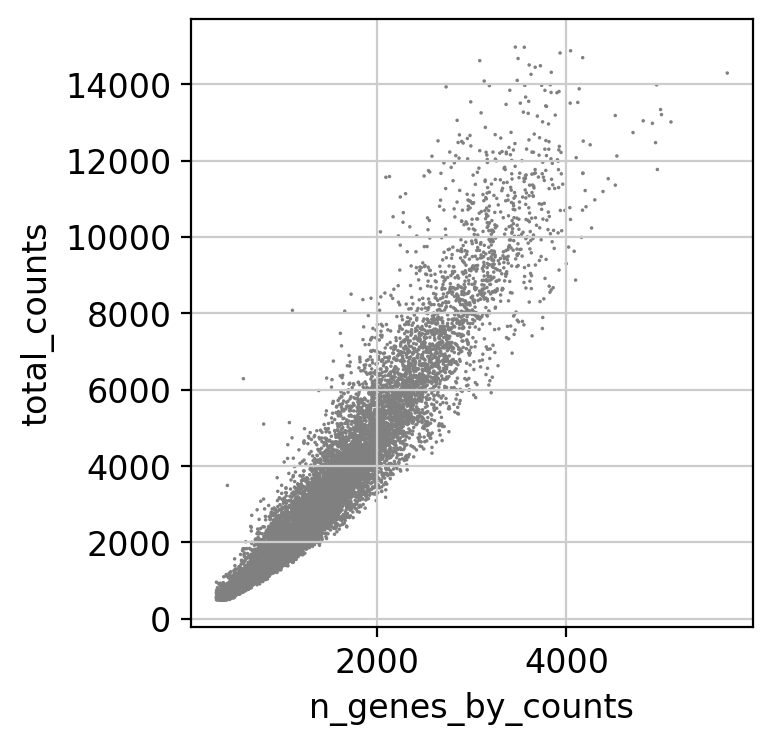

In [6]:
sc.pl.scatter(adata,"n_genes_by_counts","total_counts")

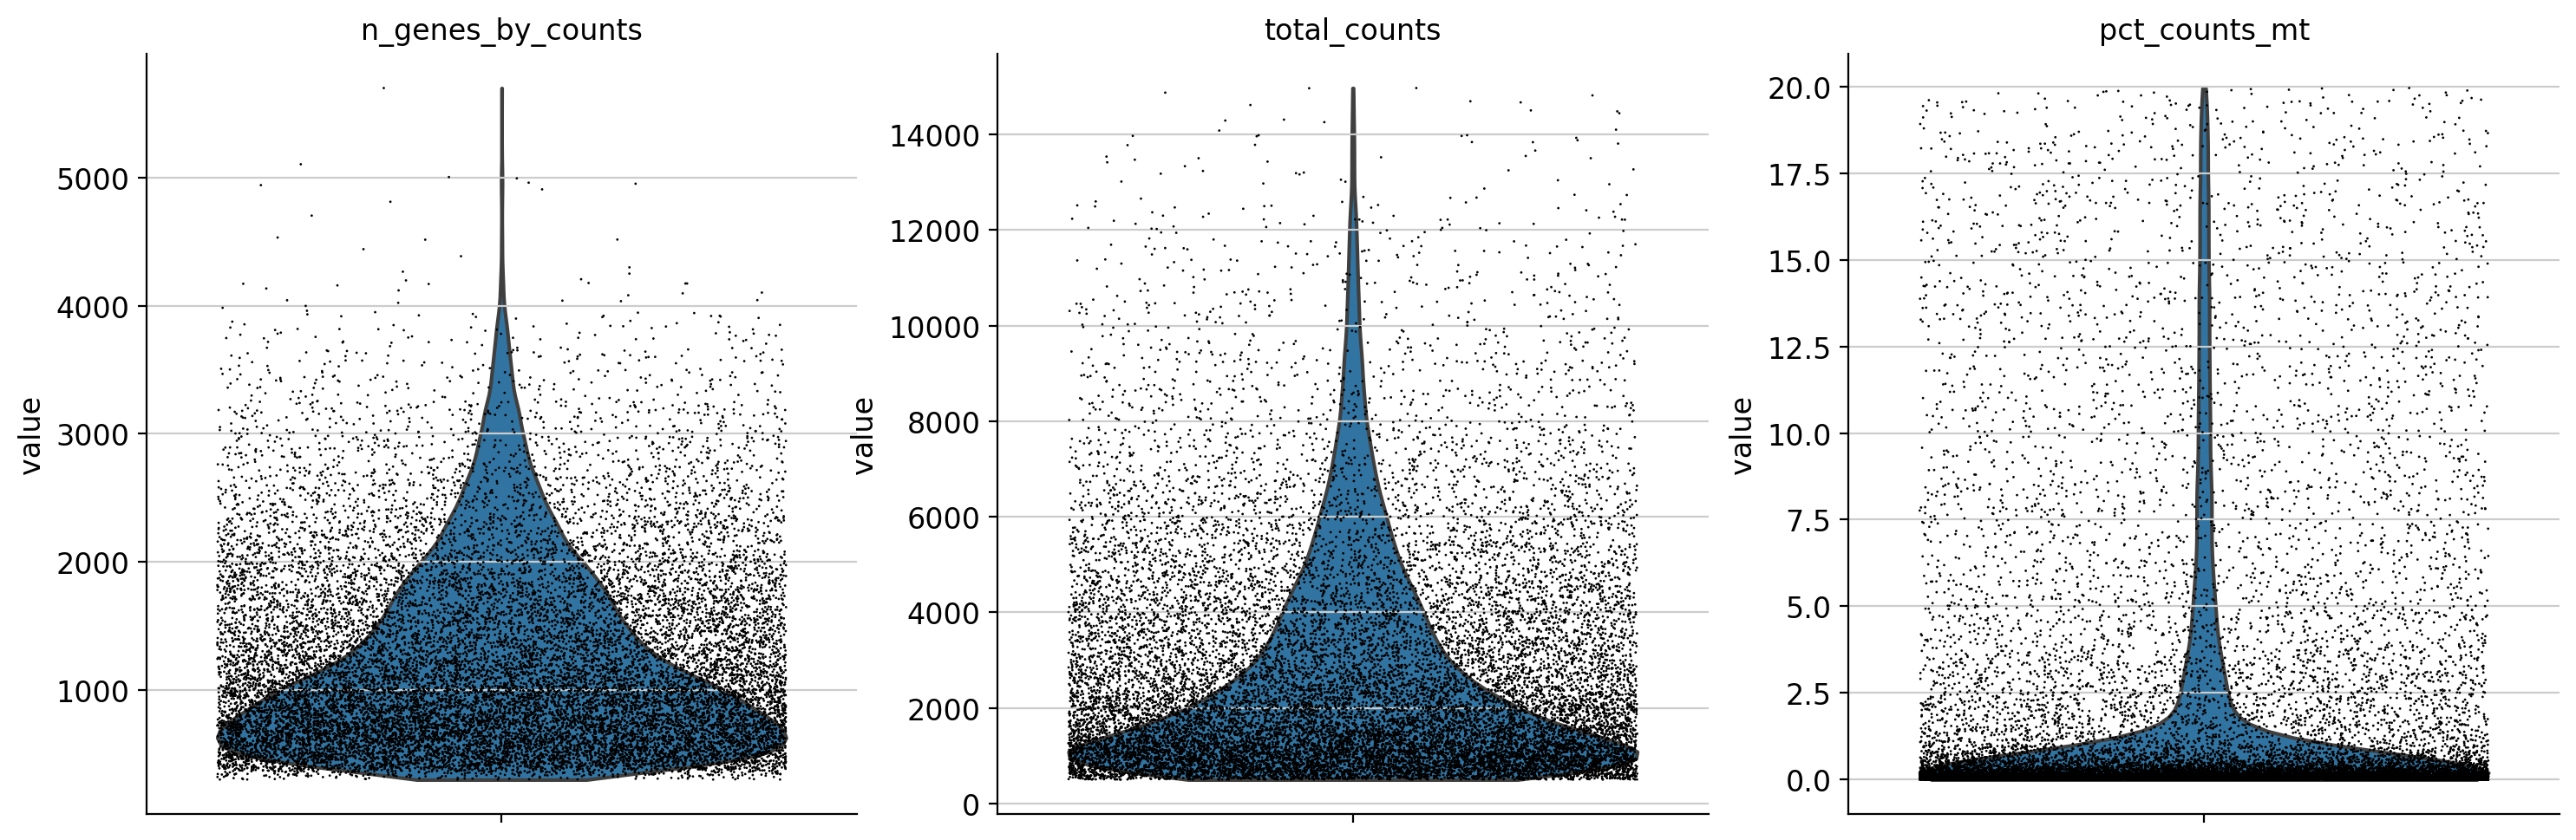

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [8]:
sc.pp.filter_cells(adata,max_genes=4000, inplace=True, copy=False)
sc.pp.filter_cells(adata,max_counts=12000, inplace=True, copy=False)

Normalization


In [9]:
adata.layers["counts"]=adata.X.copy()
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)
adata.raw=adata

In [10]:
sc.pp.highly_variable_genes(adata,n_top_genes=3500,layer="counts",flavor="seurat_v3")

In [11]:
adata = adata[:, adata.var.highly_variable].copy()

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

In [13]:
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
import scanpy.external as sce
import matplotlib.pyplot as plt
import numba

Finding the right resolution

In [14]:
lst = ['euclidean', 'correlation']
lsteuc = []
lstcor = []
lstres = []
df = pd.DataFrame(columns=lst, index=['NMI'])
for x in lst:
    print(x)
    res = 0.1
    while res <= 1.0:
        lstres.append(res)
        sc.pp.neighbors(adata, metric=x)
        sc.tl.leiden(adata, resolution=res)
        if(x == 'euclidean'):
            lsteuc.append(normalized_mutual_info_score(
                adata.obs["cell_type"], adata.obs['leiden']))
        if(x == 'correlation'):
            lstcor.append(normalized_mutual_info_score(
                adata.obs["cell_type"], adata.obs['leiden']))
        res = res+0.05
lstres = lstres[:18]
plt.plot(lstres, lsteuc, label='euclidean')
plt.plot(lstres, lstcor, label='correlation')
plt.xlabel('Resolution')
plt.ylabel('NMI')
plt.title("NMI vs Resolution for Heart Cell Atlas Dataset with Leiden clustering")
plt.legend()
plt.show

euclidean


Clustering

In [ ]:
@numba.njit(fastmath=True)
def Polaratio(x, y):
    n = x.size
    num = 0
    for j in range(0, n):  # O(n^2)
        for i in range(0, j):
            num += max(0, (x[j] - x[i]) * (y[i] - y[j]))
    return num / (num + n * np.cov(x, y)[0][1])


Error: Session cannot generate requests

Different Distance Matrices

In [ ]:
lst = ['cosine', 'euclidean', 'correlation', 'manhattan',
        'braycurtis', 'canberra', 'chebyshev', 'minkowski']
df_low= pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
df_leiden = pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
df_mid = pd.DataFrame(columns=lst, index=['NMI', 'ARI', "FM"])
for x in lst:
    print(x)
    if(x=='minkowski'):
        sc.pp.neighbors(adata, metric=x,metric_kwds={'p':0.5})
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x + '(0.5)'] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["ARI", x + '(0.5)'] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["FM", x + '(0.5)'] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.50)
        df_mid.at["NMI", x + '(0.5)'] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["ARI", x + '(0.5)'] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["FM", x + '(0.5)'] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        sc.pp.neighbors(adata, metric=x, metric_kwds={'p': 0.1})
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x + '(0.1)'] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["ARI", x + '(0.1)'] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["FM", x + '(0.1)'] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.50)
        df_mid.at["NMI", x + '(0.1)'] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["ARI", x + '(0.1)'] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["FM", x + '(0.1)'] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])
    else:
        sc.pp.neighbors(adata, metric=x)
        sc.tl.leiden(adata, resolution=0.2)
        df_low.at["NMI", x] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["ARI", x] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_low.at["FM", x] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        sc.tl.leiden(adata, resolution=0.50)
        df_mid.at["NMI", x] = normalized_mutual_info_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["ARI", x] = adjusted_rand_score(
            adata.obs["cell_type"], adata.obs['leiden'])
        df_mid.at["FM", x] = fowlkes_mallows_score(
            adata.obs["cell_type"], adata.obs['leiden'])


cosine
euclidean
correlation
manhattan
braycurtis
canberra
chebyshev
minkowski


Polaratio

In [ ]:
print("Polaratio")
sc.pp.neighbors(adata, metric=Polaratio)
sc.tl.leiden(adata, resolution=0.2)
df_low.at["NMI", "Polaratio"] = normalized_mutual_info_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_low.at["ARI", "Polaratio"] = adjusted_rand_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_low.at["FM", "Polaratio"] = fowlkes_mallows_score(
    adata.obs["cell_type"], adata.obs['leiden'])
sc.tl.leiden(adata, resolution=0.50)
df_mid.at["NMI", "Polaratio"] = normalized_mutual_info_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_mid.at["ARI", "Polaratio"] = adjusted_rand_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_mid.at["FM", "Polaratio"] = fowlkes_mallows_score(
    adata.obs["cell_type"], adata.obs['leiden'])


Polaratio


Geodesic

In [ ]:
sc.pp.neighbors(adata,n_neighbors=500,metric="cosine")
bdata = adata.obsp["distances"]
cdata = scipy.sparse.csgraph.shortest_path(bdata, directed = False)

In [ ]:
#adata.obsp["distances"] = cdata

Error: Session cannot generate requests

In [ ]:
cdata[1,:]

array([0.07674605, 0.        , 0.10242474, ..., 0.43441945, 0.43443263,
       0.43443692])

In [ ]:
n = adata.X.shape[0]
for i in range(n):
    adata.obsm['X_pca'][i][49] = i

def geodesic(A,B):
    global cdata
    return cdata[int(A[49])][int(B[49])]

Error: Session cannot generate requests

In [ ]:
print("geodesic")
sc.pp.neighbors(adata, metric=geodesic)
sc.tl.leiden(adata, resolution=0.2)
df_low.at["NMI", "Geodesic"] = normalized_mutual_info_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_low.at["ARI", "Geodesic"] = adjusted_rand_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_low.at["FM", "Geodesic"] = fowlkes_mallows_score(
    adata.obs["cell_type"], adata.obs['leiden'])
sc.tl.leiden(adata, resolution=0.50)
df_mid.at["NMI", "Geodesic"] = normalized_mutual_info_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_mid.at["ARI", "Geodesic"] = adjusted_rand_score(
    adata.obs["cell_type"], adata.obs['leiden'])
df_mid.at["FM", "Geodesic"] = fowlkes_mallows_score(
    adata.obs["cell_type"], adata.obs['leiden'])

print(df_low)
print(df_mid)
# print(df_louvain)


geodesic
       cosine euclidean correlation manhattan braycurtis  canberra chebyshev  \
NMI  0.820912  0.781537    0.810141  0.777984   0.816154  0.672035  0.799283   
ARI  0.855259  0.825236    0.857164   0.82491   0.867185  0.615314  0.824078   
FM   0.885956  0.865749    0.887074   0.86562   0.895785  0.727124  0.861317   

    minkowski  minkowski(0.5)  minkowski(0.1)  Polaratio  Geodesic  
NMI       NaN        0.779102        0.671112   0.816147  0.790738  
ARI       NaN        0.831360        0.626132   0.854935  0.822153  
FM        NaN        0.870644        0.737615   0.885561  0.859876  
       cosine euclidean correlation manhattan braycurtis  canberra chebyshev  \
NMI  0.728426  0.765127    0.738771   0.75912   0.748206  0.692068  0.741683   
ARI  0.650401  0.702826    0.696998  0.749845    0.74872  0.708425  0.635594   
FM   0.729207  0.768631    0.764436    0.8042   0.803425  0.768667  0.715996   

    minkowski  minkowski(0.5)  minkowski(0.1)  Polaratio  Geodesic  
NMI 

In [ ]:
df_low.to_excel('cortex_low.xlsx')
df_mid.to_excel('cortex_mid.xlsx')